<a href="https://colab.research.google.com/github/tillaczel/Machin-learning-workshop/blob/master/Introduction%20to%20neural%20networks/03_Feed_forvard_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.0.0-beta1

In [0]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Train x shape: (60000, 28, 28)
Train y shape: (60000,)
Test x shape: (10000, 28, 28)
Test y shape: (10000,)


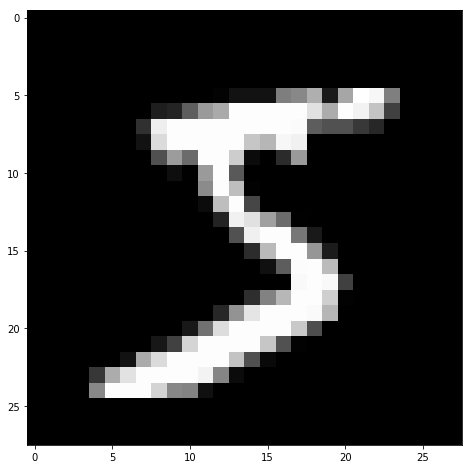

In [4]:
print(f'Train x shape: {x_train.shape}')
print(f'Train y shape: {y_train.shape}')
print(f'Test x shape: {x_test.shape}')
print(f'Test y shape: {y_test.shape}')

fig = plt.figure(figsize=(8,8))
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [5]:
print(f'Min train x: {np.min(x_train)}')
print(f'Max train x: {np.max(x_train)}')

x_train_norm, x_test_norm,= x_train/256, x_test/256
print(f'Min normalised train x: {np.min(x_train_norm)}')
print(f'Max normalised train x: {np.max(x_train_norm)}')

Min train x: 0
Max train x: 255
Min normalised train x: 0.0
Max normalised train x: 0.99609375


In [0]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 78us/sample - loss: 1.4497 - accuracy: 0.7055 - val_loss: 0.8669 - val_accuracy: 0.8369
Epoch 2/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.7033 - accuracy: 0.8501 - val_loss: 0.5636 - val_accuracy: 0.8738
Epoch 3/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.5254 - accuracy: 0.8728 - val_loss: 0.4606 - val_accuracy: 0.8866
Epoch 4/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.4512 - accuracy: 0.8833 - val_loss: 0.4080 - val_accuracy: 0.8943
Epoch 5/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.4098 - accuracy: 0.8904 - val_loss: 0.3765 - val_accuracy: 0.8994
Epoch 6/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3830 - accuracy: 0.8950 - va

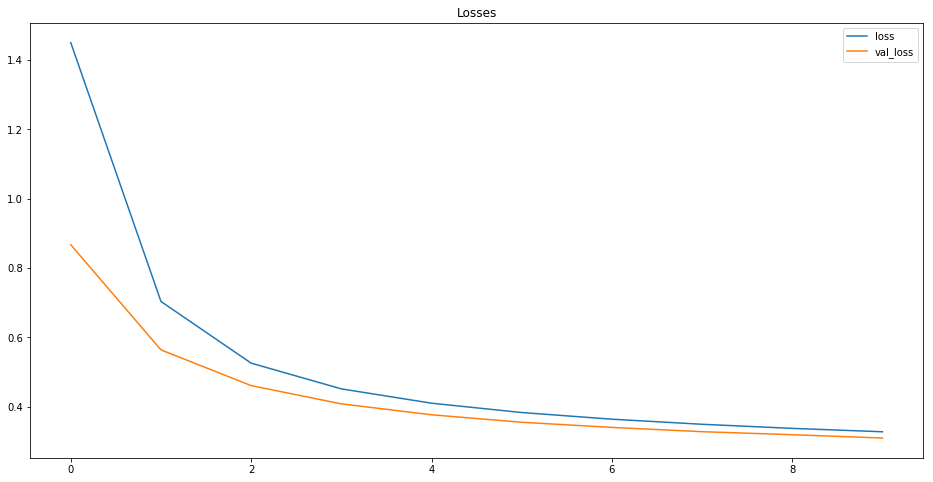

In [9]:
fig = plt.figure(figsize=(16,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Losses')
plt.show()

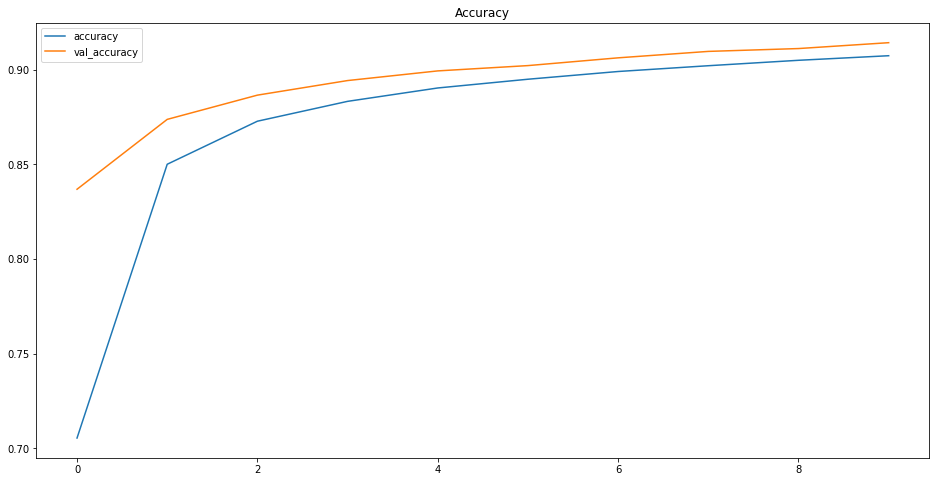

In [10]:
fig = plt.figure(figsize=(16,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.show()

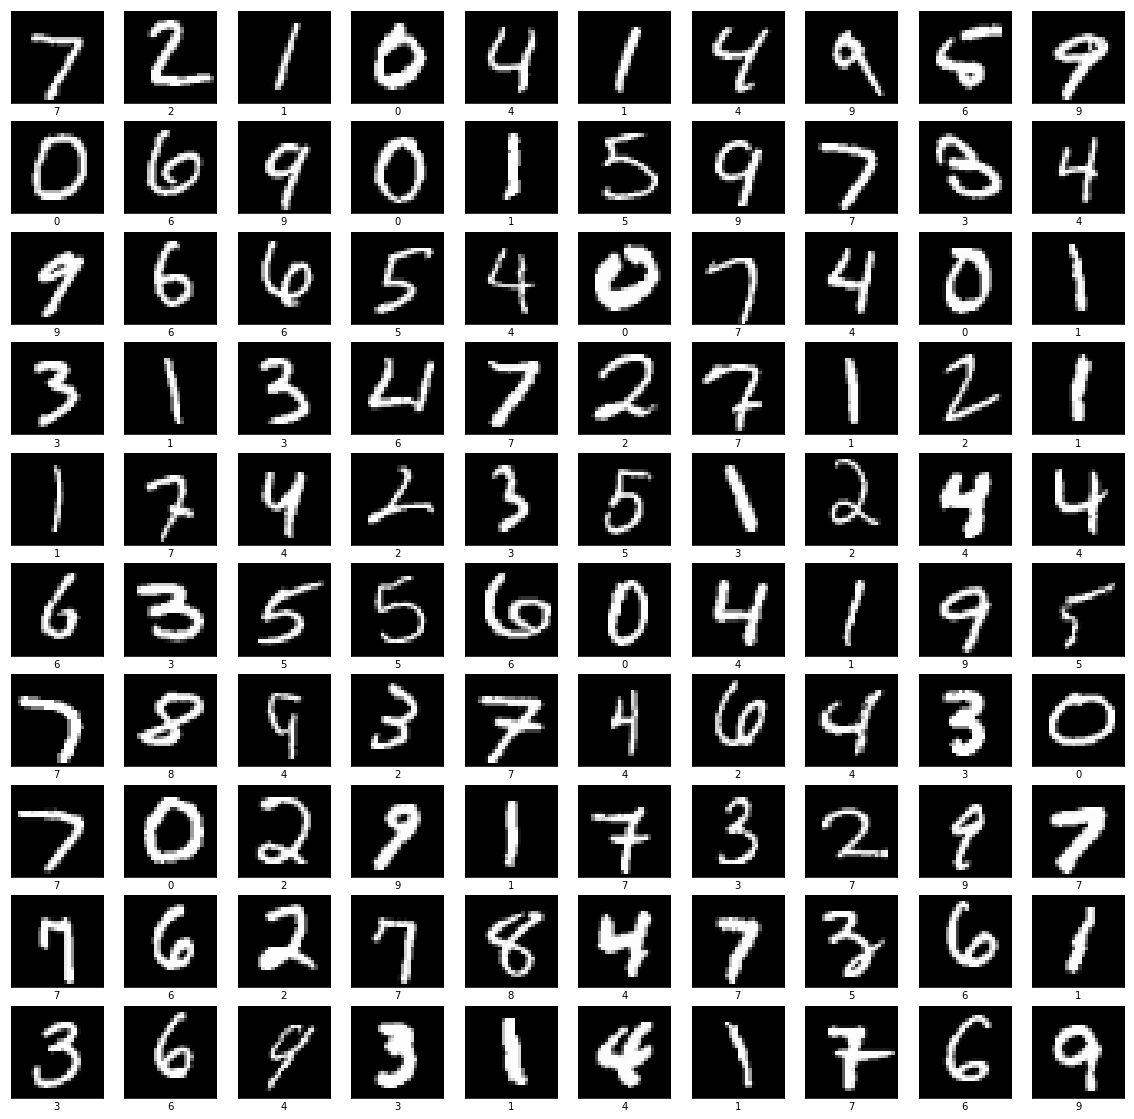

In [11]:
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test_norm[i], cmap='gray')
    plt.xlabel(np.argmax(model.predict(x_test_norm[i, np.newaxis])))
plt.show()